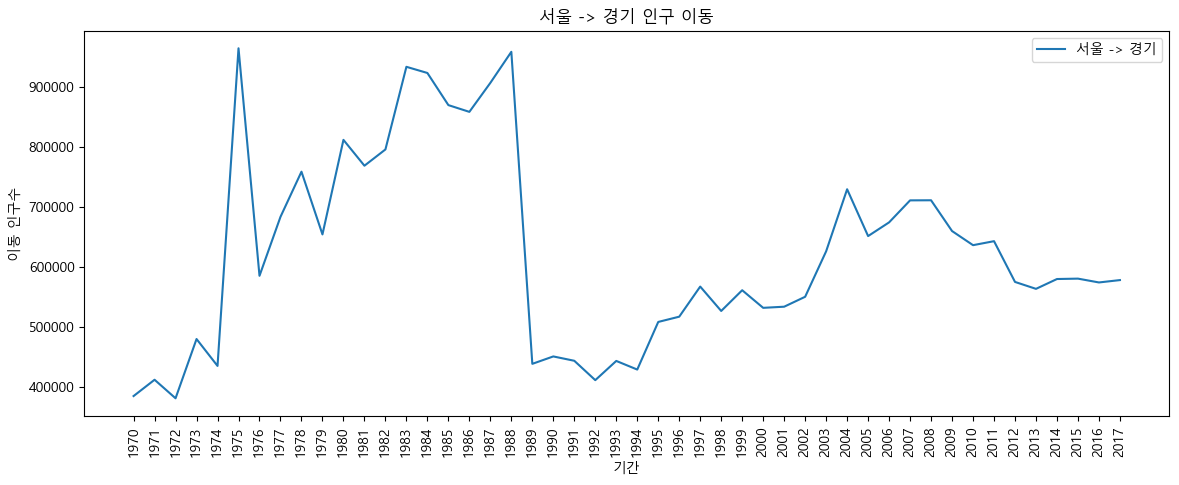

In [19]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:/Users/yujun/pandas/part4/data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('C:/Users/yujun/pandas/part4/data/시도별_전출입_인구수.xlsx')

df = df.ffill()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

mask = (df['전입지별'] == '충청남도')
df_choongnam = df[mask]
df_choongnam = df_choongnam.drop(['전출지별'], axis=1)
df_choongnam = df_choongnam.rename({'전입지별' : '전입지'}, axis=1)
df_choongnam = df_choongnam.set_index('전입지')

df_choongnam.loc['충남', :] = 0

for i in range(len(df_choongnam['1970']) - 1):
    for j in range(len(df_choongnam.iloc[0])):
        if(df_choongnam.iloc[i,j] == '-'):
            df_choongnam.iloc[i,j] = 0

for i in range(len(df_choongnam['1970']) - 1):
    df_choongnam.loc['충남', :] += df_choongnam.iloc[i]

choongnam = df_choongnam.loc['충남']

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(choongnam.index, choongnam.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력